In [ ]:
# 🧠 Enhanced Genetic Algorithm–Optimized Random Forest (EGA-RF)
## Credit Card Fraud Detection Project
### Author: Milli Srivastava


In [13]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns
from deap import base, creator, tools, algorithms
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [3]:
# 2️⃣ Load Dataset
df = pd.read_csv('creditcard.csv')
print(df.shape)
print(df['Class'].value_counts())
df.head()


(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# 3️⃣ Data Preprocessing
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])
df = df.drop(['Time','Amount'], axis=1)


In [5]:
# 4️⃣ Handle Class Imbalance
from imblearn.over_sampling import SMOTE
X = df.drop('Class', axis=1)
y = df['Class']
smt = SMOTE(random_state=42)
X_res, y_res = smt.fit_resample(X, y)


In [6]:
# 5️⃣ Apply Genetic Algorithm for Feature Selection
from deap import base, creator, tools, algorithms
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X_res.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def eval_model(individual):
    selected_features = [bool(i) for i in individual]
    if sum(selected_features) == 0:
        return 0.,
    X_selected = X_res.iloc[:, selected_features]
    model = LogisticRegression(max_iter=1000)
    score = cross_val_score(model, X_selected, y_res, cv=3, scoring='f1').mean()
    return score,

toolbox.register("evaluate", eval_model)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=20)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)


gen	nevals
0  	20    
1  	9     
2  	12    
3  	15    
4  	12    
5  	13    
6  	16    
7  	18    
8  	13    
9  	8     
10 	14    


([[0,
   1,
   0,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   0],
  [0,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   0],
  [0,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   0],
  [0,
   1,
   0,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   0,
   1,
   0],
  [0,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   1,
   1,
   1,
   0,
   0,
   0,
   1,
   0],
  [0,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   0,
   1,
   0,
   1,
   1,
   1,
   1,
   1,

In [7]:
# 6️⃣ Train Random Forest Model on Selected Features
best_features = [bool(i) for i in tools.selBest(population, 1)[0]]
X_train, X_test, y_train, y_test = train_test_split(X_res.iloc[:, best_features], y_res, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [8]:
# 7️⃣ Evaluate Model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, y_pred))


[[56735    15]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC-AUC Score: 0.9998678414096916


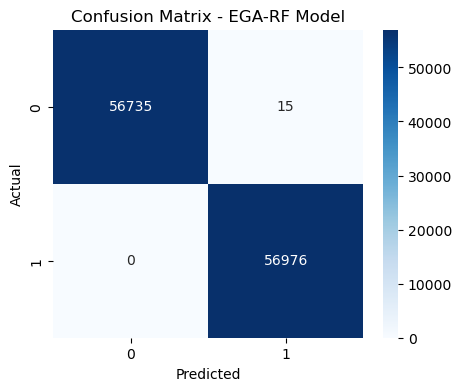

In [9]:
#visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - EGA-RF Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

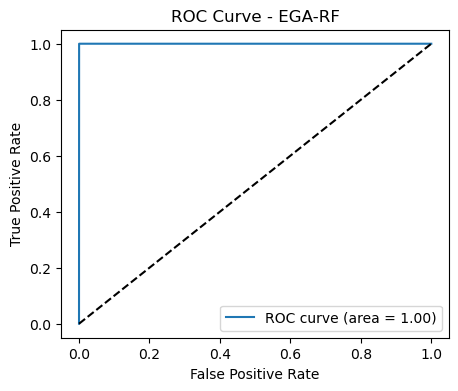

In [10]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - EGA-RF')
plt.legend()
plt.show()


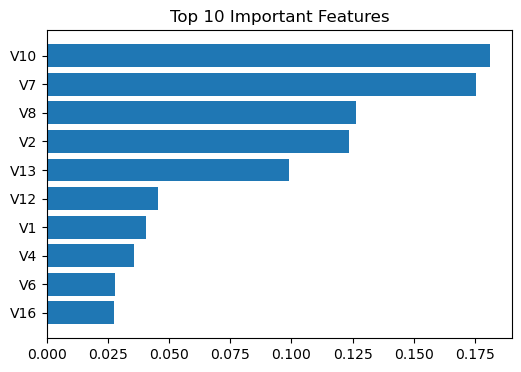

In [11]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10
plt.figure(figsize=(6,4))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X_res.columns[indices])
plt.title('Top 10 Important Features')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Random Forest (Base)": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_base = model.predict(X_test)
    print(f"\n{name}")
    print("F1-Score:", f1_score(y_test, y_pred_base))



Logistic Regression
F1-Score: 0.942089552238806
